In [13]:
%pip install catboost
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, RocCurveDisplay
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("badcodebuilder/insdn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/insdn-dataset


In [10]:
import os

# List the files in the dataset directory
print("Files in path:", os.listdir(path))

Files in path: ['InSDN_DatasetCSV']


In [11]:
import os
import pandas as pd

# Define the full path to the folder containing the CSV
folder_path = "/root/.cache/kagglehub/datasets/badcodebuilder/insdn-dataset/versions/2/InSDN_DatasetCSV"

# List files inside that folder to find the CSV file name
print("Files in subfolder:", os.listdir(folder_path))

Files in subfolder: ['OVS.csv', 'metasploitable-2.csv', 'Normal_data.csv']


In [12]:
csv_file_path = os.path.join(folder_path, 'metasploitable-2.csv')

# Load the CSV into a pandas DataFrame
df1 = pd.read_csv(csv_file_path)
df1

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.3.130-200.175.2.130-38694-4444-6,192.168.3.130,38694,200.175.2.130,4444,6,10/1/2020 5:02,269709,4,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
1,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/1/2020 5:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
2,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/1/2020 5:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
3,192.168.3.130-200.175.2.130-8180-38745-6,200.175.2.130,38745,192.168.3.130,8180,6,10/1/2020 1:39,9556,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
4,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/1/2020 1:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136738,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 20:36,273133,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136739,192.168.3.130-200.175.2.130-41967-4444-6,192.168.3.130,41967,200.175.2.130,4444,6,10/1/2020 20:36,267969,6,7,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136740,192.168.3.130-200.175.2.130-139-44791-6,200.175.2.130,44791,192.168.3.130,139,6,10/1/2020 4:41,1552555,6,5,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R
136741,192.168.3.130-200.175.2.130-41966-4444-6,192.168.3.130,41966,200.175.2.130,4444,6,10/1/2020 4:41,272141,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,U2R


In [13]:
# Load the CSV into a pandas DataFrame
csv_file_path = os.path.join(folder_path, 'Normal_data.csv')
df2 = pd.read_csv(csv_file_path)
df2

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,185.127.17.56-192.168.20.133-443-53648-6,185.127.17.56,443,192.168.20.133,53648,6,5/2/2020 13:58,245230,44,40,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,185.127.17.56-192.168.20.133-443-53650-6,192.168.20.133,53650,185.127.17.56,443,6,5/2/2020 13:58,1605449,107,149,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.133,35108,192.168.20.2,53,6,5/2/2020 13:58,53078,5,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,192.168.20.133-192.168.20.2-35108-53-6,192.168.20.2,53,192.168.20.133,35108,6,5/2/2020 13:58,6975,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,154.59.122.74-192.168.20.133-443-60900-6,192.168.20.133,60900,154.59.122.74,443,6,5/2/2020 13:58,190141,13,16,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68419,185.127.17.56-192.168.20.133-443-36100-6,192.168.20.133,36100,185.127.17.56,443,6,5/2/2020 19:20,1895,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68420,192.168.20.133-192.168.20.2-53032-53-17,192.168.20.133,53032,192.168.20.2,53,17,5/2/2020 19:21,3842,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68421,192.168.20.133-192.168.20.2-39285-53-17,192.168.20.133,39285,192.168.20.2,53,17,5/2/2020 19:19,3731,1,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
68422,192.168.20.133-192.168.20.2-49895-53-17,192.168.20.133,49895,192.168.20.2,53,17,5/2/2020 19:18,20591,0,2,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [14]:
csv_file_path = os.path.join(folder_path, 'OVS.csv')

# Load the CSV into a pandas DataFrame
df3 = pd.read_csv(csv_file_path)
df3

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,4045,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
1,172.17.0.2-200.175.2.130-80-48856-6,200.175.2.130,48856,172.17.0.2,80,6,12/1/2020 1:14,284,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
2,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,4302,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
3,172.17.0.2-200.175.2.130-80-48858-6,200.175.2.130,48858,172.17.0.2,80,6,12/1/2020 1:14,83,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
4,172.17.0.2-200.175.2.130-80-48860-6,200.175.2.130,48860,172.17.0.2,80,6,12/1/2020 1:14,3760,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BFA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138717,172.17.0.2-200.175.2.130-80-55440-6,200.175.2.130,55440,172.17.0.2,80,6,25/12/2019 05:19:55 PM,296,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138718,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,3431,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138719,172.17.0.2-200.175.2.130-80-55446-6,200.175.2.130,55446,172.17.0.2,80,6,25/12/2019 05:20:00 PM,4121,1,1,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack
138720,172.17.0.2-200.175.2.130-80-55456-6,200.175.2.130,55456,172.17.0.2,80,6,25/12/2019 05:20:05 PM,5887,2,5,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web-Attack


In [15]:
# Merge all datasets
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print(f"Combined dataset shape: {df_combined.shape}")
print(f"Label distribution:\n{df_combined['Label'].value_counts()}")

Combined dataset shape: (343889, 84)
Label distribution:
Label
Probe         98129
DDoS          73529
Normal        68424
DoS           53616
DDoS          48413
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: count, dtype: int64


In [16]:
# Combine all datasets
df_combined = pd.concat([df1, df2, df3], ignore_index=True)
print(f"Combined dataset shape: {df_combined.shape}")

# Check label distribution
print("\nLabel distribution:")
print(df_combined['Label'].value_counts())

# Drop unnecessary columns
columns_to_drop = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp']
df_clean = df_combined.drop(columns=columns_to_drop, errors='ignore')

# Handle infinite and NaN values
df_clean = df_clean.replace([np.inf, -np.inf], np.nan)
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

# Convert categorical labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
df_clean['Label_Encoded'] = label_encoder.fit_transform(df_clean['Label'])

# Create binary classification (Normal vs Attack)
df_clean['Label_Binary'] = df_clean['Label'].apply(lambda x: 0 if x == 'Normal' else 1)

# Show encoding mapping
print("\nLabel encoding mapping:")
for i, label in enumerate(label_encoder.classes_):
    print(f"{label}: {i}")

# Prepare features and target
X = df_clean.drop(['Label', 'Label_Encoded', 'Label_Binary'], axis=1)
y = df_clean['Label_Binary']

# Convert all features to numeric
X = X.select_dtypes(include=[np.number])

print(f"\nFeatures shape: {X.shape}")
print(f"Target distribution: {np.bincount(y)}")

Combined dataset shape: (343889, 84)

Label distribution:
Label
Probe         98129
DDoS          73529
Normal        68424
DoS           53616
DDoS          48413
BFA            1405
Web-Attack      192
BOTNET          164
U2R              17
Name: count, dtype: int64

Label encoding mapping:
BFA: 0
BOTNET: 1
DDoS: 2
DDoS : 3
DoS: 4
Normal: 5
Probe: 6
U2R: 7
Web-Attack: 8

Features shape: (343889, 79)
Target distribution: [ 68424 275465]


There is no Missing Values in this database and as for Outliers , we didn't removed them. Because Outliers in network traffic often indicate attacks or anomalies (e.g., DDoS, scans). Removing them risks losing key intrusion patterns, which might make models biased.So they should be kept for accurate detection.

## **Chi-Square Test**

In [17]:
from scipy import stats
import pandas as pd
import numpy as np

def chi_square_significance(X, y, alpha=0.05):
    sig_features = []
    results = []

    # Ensure target is categorical
    y_cat = y.astype("category")

    # Loop through features
    for col in X.columns:
        # Treat feature as categorical
        contingency = pd.crosstab(X[col].astype(str).fillna("NA"), y_cat)
        try:
            chi2, p_val, dof, exp = stats.chi2_contingency(contingency)
        except Exception:
            chi2, p_val = np.nan, np.nan
        results.append((col, chi2, p_val))
        if pd.notnull(p_val) and p_val < alpha:
            sig_features.append(col)

    sig_df = pd.DataFrame(results, columns=["feature", "chi2_statistic", "p_value"])
    return sig_df.sort_values("p_value"), sig_features

# Run Chi-Square test
sig_df, significant_features = chi_square_significance(X, y, alpha=0.05)
print("Significant features (alpha=0.05):")
print(significant_features)
display(sig_df.head(20))

Significant features (alpha=0.05):
['Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byt

,feature,chi2_statistic,p_value
0,Src Port,193188.052009,0.0
1,Dst Port,312077.318561,0.0
2,Protocol,165689.606667,0.0
3,Flow Duration,187270.106779,0.0
4,Tot Fwd Pkts,241389.753959,0.0
5,Tot Bwd Pkts,211378.084814,0.0
6,TotLen Fwd Pkts,232612.251351,0.0
7,TotLen Bwd Pkts,260411.523269,0.0
8,Fwd Pkt Len Max,236019.171653,0.0
9,Fwd Pkt Len Min,144094.899479,0.0


# **Feature Importance using SHAP**

In [25]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Check if required variables are defined; if not, recreate them
if 'X_train_scaled' not in globals() or 'y_train_smote' not in globals() or 'X_test_scaled' not in globals():
    print("\nRequired variables not found. Recreating data pipeline...")
    # Placeholder for X and y (replace with your actual data loading if available)
    # Example assumes X is a DataFrame and y is a Series/array
    try:
        X = pd.DataFrame(globals()['X'])  # Use existing X if available
        y = globals()['y']
    except NameError:
        print("X and y not found. Please ensure they are defined or load your dataset.")
        raise NameError("X and y must be defined for the pipeline.")

    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y
    )

    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)
    X_test_scaled = scaler.transform(X_test)
else:
    print("\nUsing existing X_train_scaled, y_train_smote, and X_test_scaled.")


print(f"\n{'='*50}")
print("SHAP Analysis")
print(f"{'='*50}")

# Train XGBoost model
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train_smote)

# Create SHAP TreeExplainer
explainer = shap.TreeExplainer(xgb_model)

# Use a sample of test data for SHAP computation
sample_size = min(1000, X_test_scaled.shape[0])
X_test_scaled_sample = X_test_scaled[:sample_size]

# Compute SHAP values
shap_values = explainer.shap_values(X_test_scaled_sample)

# Handle multiclass or binary classification
if isinstance(shap_values, list):  # Multiclass
    shap_values_for_plot = shap_values[0]  # Use first class for plot
else:  # Binary
    shap_values_for_plot = shap_values

# Feature names
feature_names = X.columns if 'X' in globals() else [f"feature_{i}" for i in range(X_test_scaled.shape[1])]
X_test_scaled_sample_df = pd.DataFrame(X_test_scaled_sample, columns=feature_names)

# SHAP summary plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_for_plot, X_test_scaled_sample_df, show=False)
plt.title('SHAP Summary Plot - Feature Importance')
plt.tight_layout()
plt.savefig('shap_summary_plot.png')
plt.close()
print("\nSHAP summary plot saved as 'shap_summary_plot.png'")

# Compute feature importance
if isinstance(shap_values, list):  # Multiclass
    feature_importance = np.mean([np.abs(val).mean(0) for val in shap_values], axis=0)
else:  # Binary
    feature_importance = np.abs(shap_values).mean(0)

# Create and sort feature importance DataFrame
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(importance_df.head(15).to_string(index=False))


Required variables not found. Recreating data pipeline...

SHAP Analysis

SHAP summary plot saved as 'shap_summary_plot.png'

Top 15 Most Important Features:
          feature  importance
      Pkt Len Max    5.299474
Init Bwd Win Byts    3.215057
   Bwd Header Len    1.016110
     SYN Flag Cnt    0.889321
         Dst Port    0.863593
     ACK Flag Cnt    0.717508
         Src Port    0.663906
       Fwd Pkts/s    0.651294
      Bwd IAT Min    0.446682
   Fwd Header Len    0.381058
      Flow Pkts/s    0.362521
     FIN Flag Cnt    0.340982
  TotLen Bwd Pkts    0.314136
     Flow IAT Min    0.285640
    Flow Duration    0.235894


# **Feature Selection using Mutual Information**

In [26]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import StandardScaler

print("\nFeature Selection with Mutual Information")

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute mutual information scores and select top features
k = min(10, X_scaled.shape[1])  # Select top 10 features or all if fewer
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selector.fit(X_scaled, y)
selected_features = X.columns[selector.get_support()].tolist()
print(f"Selected {len(selected_features)} features by Mutual Information: {selected_features}")


Feature Selection with Mutual Information
Selected 10 features by Mutual Information: ['Dst Port', 'Bwd Pkt Len Mean', 'Fwd Header Len', 'Bwd Header Len', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'Pkt Size Avg', 'Bwd Seg Size Avg']


# **Splitting Data**

In [28]:
from sklearn.model_selection import train_test_split

print("\nSplitting dataset: 80% Training, 20% Testing")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, train_size=0.8, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Splitting dataset: 80% Training, 20% Testing
Training set shape: (275111, 79), Testing set shape: (68778, 79)


# **Label Counts**

In [29]:
import pandas as pd

print("\nLabel Counts in Training Set (y_train):")
label_counts = pd.Series(y_train).value_counts()
print(label_counts)


Label Counts in Training Set (y_train):
Label_Binary
1    220372
0     54739
Name: count, dtype: int64


# **Handling Class Imbalance using techniques like SMOT**

In [30]:
from imblearn.over_sampling import SMOTE
import pandas as pd

print("\nLabel Counts in Training Set (y_train) Before SMOTE:")
print(pd.Series(y_train).value_counts())

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nLabel Counts in Training Set (y_train_smote) After SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Label Counts in Training Set (y_train) Before SMOTE:
Label_Binary
1    220372
0     54739
Name: count, dtype: int64

Label Counts in Training Set (y_train_smote) After SMOTE:
Label_Binary
1    220372
0    220372
Name: count, dtype: int64


# **Applying Scaling MinMax**

In [31]:
from sklearn.preprocessing import MinMaxScaler

print("\nApplying MinMaxScaler to balanced training and test data")
# Initialize and fit MinMaxScaler on balanced training data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

print(f"Scaled training set shape: {X_train_scaled.shape}")
print(f"Scaled test set shape: {X_test_scaled.shape}")


Applying MinMaxScaler to balanced training and test data
Scaled training set shape: (440744, 79)
Scaled test set shape: (68778, 79)


# **Model Training**

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Dictionary of models to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, n_jobs=-1)
}

# Train each model and print training time and classification report
for model_name, model in models.items():
    print(f"\nTraining {model_name}")

    # Measure training time
    start_time = time.time()
    model.fit(X_train_scaled, y_train_smote)
    training_time = time.time() - start_time

    print(f"Training time: {training_time:.4f} seconds")

    # Generate and print training report
    y_train_pred = model.predict(X_train_scaled)
    print(f"\n{model_name} Training Classification Report:")
    print(classification_report(y_train_smote, y_train_pred, digits=4))


Training Logistic Regression
Training time: 5.9387 seconds

Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0     0.9965    0.9901    0.9933    220372
           1     0.9902    0.9965    0.9934    220372

    accuracy                         0.9933    440744
   macro avg     0.9934    0.9933    0.9933    440744
weighted avg     0.9934    0.9933    0.9933    440744


Training Decision Tree
Training time: 18.5100 seconds

Decision Tree Training Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000    220372
           1     1.0000    1.0000    1.0000    220372

    accuracy                         1.0000    440744
   macro avg     1.0000    1.0000    1.0000    440744
weighted avg     1.0000    1.0000    1.0000    440744


Training Random Forest
Training time: 83.8924 seconds

Random Forest Training Classification Report:
              precision    re

# **Cross Validation**

In [3]:
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.utils import resample
import numpy as np

# Define models if not already defined
try:
    models
except NameError:
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.naive_bayes import GaussianNB
    from xgboost import XGBClassifier

    models = {
        "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
        "KNN": KNeighborsClassifier(n_jobs=-1),
        "Naive Bayes": GaussianNB(),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42),
        "XGBoost": XGBClassifier(random_state=42, n_jobs=-1)
    }

# Subsample 20% of the training data (stratified)
def subsample_data(X, y, fraction=0.2, random_state=42):
    X_sub, y_sub = resample(X, y, stratify=y, n_samples=int(len(y) * fraction), random_state=random_state)
    return X_sub, y_sub

# Assume X_train_scaled, y_train_smote are defined
X_train_sub, y_train_sub = subsample_data(X_train_scaled, y_train_smote, fraction=0.2)

# Function to compute learning curve with fewer training sizes
def get_learning_curve_data(model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring='accuracy', n_jobs=-1, train_sizes=train_sizes
    )
    train_mean = np.mean(train_scores, axis=1).tolist()  # Convert to list of floats
    val_mean = np.mean(val_scores, axis=1).tolist()      # Convert to list of floats
    return train_sizes, train_mean, val_mean

# Perform 5-fold cross-validation and learning curves
for model_name, model in models.items():
    print(f"\n{model_name} Cross-Validation Results:")

    # 5-fold cross-validation
    scores = cross_val_score(model, X_train_sub, y_train_sub, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy for each fold: {[f'{score:.4f}' for score in scores]}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")
    print(f"Standard Deviation: {np.std(scores):.4f}")

    # Learning curve data
    train_sizes, train_mean, val_mean = get_learning_curve_data(model, X_train_sub, y_train_sub)

    print(f"\n{model_name} Learning Curve Data:")
    print(f"Training sizes: {train_sizes.tolist()}")
    print(f"Training accuracy mean: {[f'{x:.4f}' for x in train_mean]}")
    print(f"Validation accuracy mean: {[f'{x:.4f}' for x in val_mean]}")


Logistic Regression Cross-Validation Results:
Accuracy for each fold: ['0.7815', '0.7777', '0.7799', '0.7784', '0.7775']
Mean Accuracy: 0.7790
Standard Deviation: 0.0015

Logistic Regression Learning Curve Data:
Training sizes: [10308, 33503, 56697, 79892, 103087]
Training accuracy mean: ['0.7782', '0.7802', '0.7797', '0.7790', '0.7790']
Validation accuracy mean: ['0.7790', '0.7788', '0.7786', '0.7788', '0.7790']

Decision Tree Cross-Validation Results:
Accuracy for each fold: ['0.9071', '0.9084', '0.9059', '0.9075', '0.9107']
Mean Accuracy: 0.9079
Standard Deviation: 0.0016

Decision Tree Learning Curve Data:
Training sizes: [10308, 33503, 56697, 79892, 103087]
Training accuracy mean: ['1.0000', '1.0000', '1.0000', '1.0000', '1.0000']
Validation accuracy mean: ['0.8268', '0.8637', '0.8840', '0.8979', '0.9079']

Random Forest Cross-Validation Results:
Accuracy for each fold: ['0.9229', '0.9222', '0.9226', '0.9207', '0.9218']
Mean Accuracy: 0.9221
Standard Deviation: 0.0008

Random For

# **Testing time along with the testing report (4 digits), and the confusion matrix, ROC curve, and Kappa score with ensemble model.**


Training Logistic Regression
Training time: 4.50s
Testing time: 0.00s
              precision    recall  f1-score   support

           0     0.9841    0.8076    0.8872     26112
           1     0.1859    0.7708    0.2995      1488

    accuracy                         0.8056     27600
   macro avg     0.5850    0.7892    0.5933     27600
weighted avg     0.9411    0.8056    0.8555     27600

Cohen's Kappa: 0.2329

Training Decision Tree
Training time: 14.70s
Testing time: 0.02s
              precision    recall  f1-score   support

           0     0.9836    0.9372    0.9598     26112
           1     0.3971    0.7258    0.5133      1488

    accuracy                         0.9258     27600
   macro avg     0.6903    0.8315    0.7366     27600
weighted avg     0.9520    0.9258    0.9358     27600

Cohen's Kappa: 0.4768

Training Random Forest
Training time: 24.20s
Testing time: 0.13s
              precision    recall  f1-score   support

           0     0.9908    0.9421    0.9658 

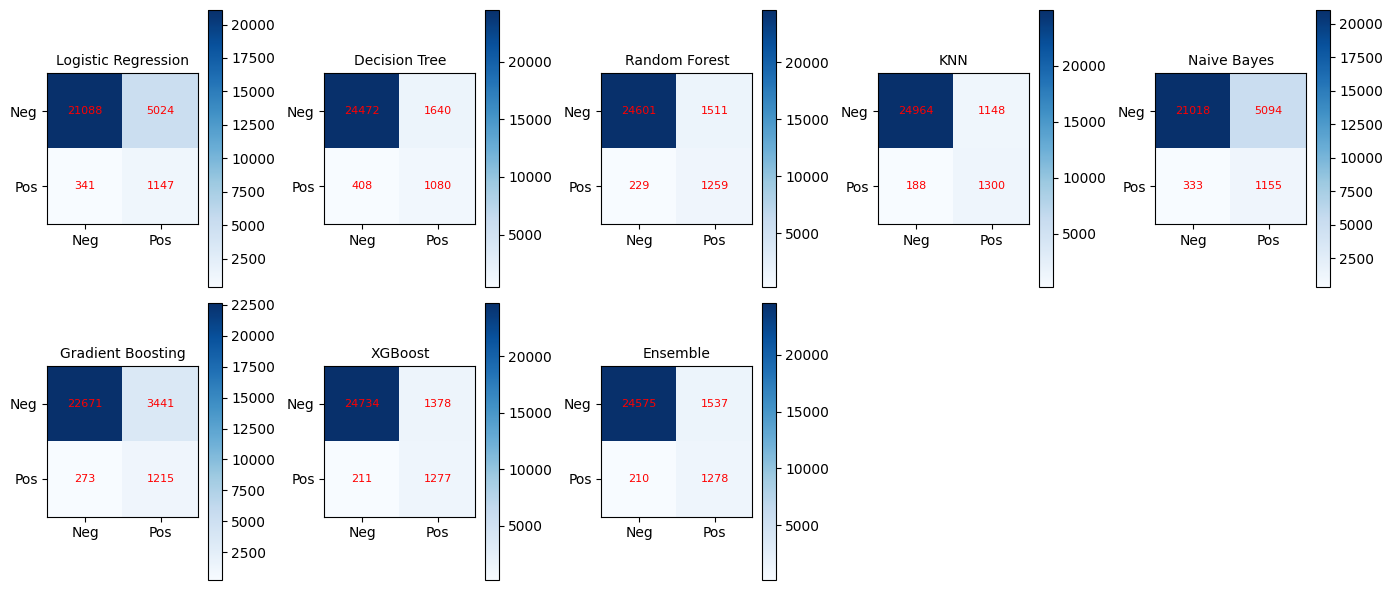

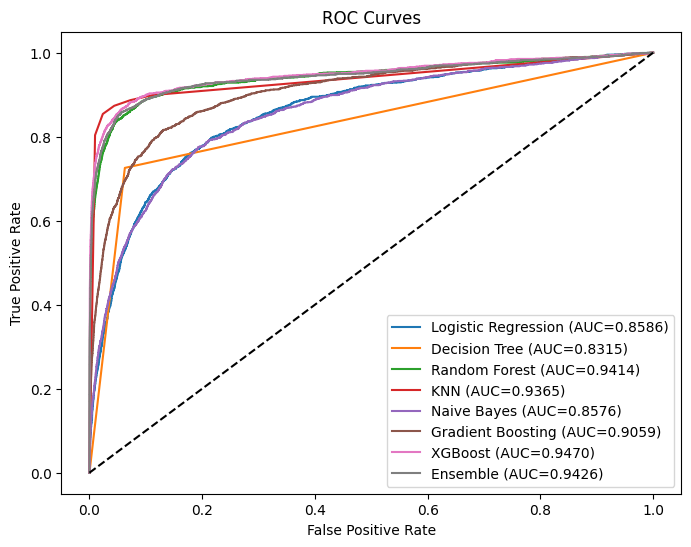

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# ==== Generate synthetic dataset (optimized size for speed) ====
X, y = make_classification(
    n_samples=120000,  # Reduced from 440k for speed
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# ==== Train-Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# ==== Feature Scaling ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== Apply SMOTE ====
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# ==== Define Models ====
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=30, random_state=42, eval_metric='logloss', n_jobs=-1)
}

# Add Ensemble
models["Ensemble"] = VotingClassifier(
    estimators=[
        ('rf', models["Random Forest"]),
        ('gb', models["Gradient Boosting"]),
        ('xgb', models["XGBoost"])
    ],
    voting='soft',
    n_jobs=-1
)

# ==== Store ROC Data ====
roc_data = {}

# ==== Train, Test & Plot ====
plt.figure(figsize=(14, 6))
for i, (name, model) in enumerate(models.items()):
    print(f"\n{'='*50}\nTraining {name}\n{'='*50}")
    start_time = time.time()
    model.fit(X_train_balanced, y_train_balanced)
    print(f"Training time: {time.time() - start_time:.2f}s")

    # Testing
    start_time = time.time()
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    print(f"Testing time: {time.time() - start_time:.2f}s")

    # Metrics
    print(classification_report(y_test, y_pred, digits=4))
    print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred):.4f}")

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, len(models)//2 + 1, i+1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(name, fontsize=10)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Neg", "Pos"])
    plt.yticks(tick_marks, ["Neg", "Pos"])
    for r in range(cm.shape[0]):
        for c in range(cm.shape[1]):
            plt.text(c, r, cm[r, c], ha="center", va="center", color="red", fontsize=8)

    # ROC Data
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_data[name] = (fpr, tpr, auc(fpr, tpr))

plt.tight_layout()
plt.show()

# ==== ROC Curve Plot ====
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()


# **mcnemar score.**

In [8]:
from itertools import combinations
from mlxtend.evaluate import mcnemar
from sklearn.metrics import confusion_matrix
import numpy as np

# Store test predictions for each model (simulated from confusion matrices)
# Using the confusion matrices from the previous response to derive correct/incorrect predictions
model_predictions = {}
for model_name, model in models.items():
    # Predict on test set
    y_test_pred = model.predict(X_test_scaled)
    model_predictions[model_name] = y_test_pred

# Function to create McNemar contingency table
def get_mcnemar_table(y_true, y_pred1, y_pred2):
    # Correct (1) or incorrect (0) predictions for each model
    correct1 = (y_true == y_pred1).astype(int)
    correct2 = (y_true == y_pred2).astype(int)
    # Contingency table: [both correct, model1 correct/model2 wrong, model1 wrong/model2 correct, both wrong]
    n00 = np.sum((correct1 == 0) & (correct2 == 0))
    n01 = np.sum((correct1 == 0) & (correct2 == 1))
    n10 = np.sum((correct1 == 1) & (correct2 == 0))
    n11 = np.sum((correct1 == 1) & (correct2 == 1))
    return np.array([[n11, n10], [n01, n00]])

# Perform McNemar test for all model pairs
print("McNemar Test Results for Pairwise Model Comparisons:")
for model1_name, model2_name in combinations(models.keys(), 2):
    y_pred1 = model_predictions[model1_name]
    y_pred2 = model_predictions[model2_name]

    # Get contingency table
    contingency_table = get_mcnemar_table(y_test, y_pred1, y_pred2)

    # Compute McNemar test using mlxtend
    try:
        stat, p_value = mcnemar(contingency_table, exact=False) # Removed correction=True
        print(f"\n{model1_name} vs {model2_name}:")
        print(f"Contingency Table:\n{contingency_table}")
        print(f"McNemar Statistic: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        print("Significant difference" if p_value < 0.05 else "No significant difference")
    except ValueError as e:
        print(f"\n{model1_name} vs {model2_name}: Error computing McNemar test - {e}")

McNemar Test Results for Pairwise Model Comparisons:

Logistic Regression vs Decision Tree:
Contingency Table:
[[21033  1202]
 [ 4519   846]]
McNemar Statistic: 1922.0164
P-value: 0.0000
Significant difference

Logistic Regression vs Random Forest:
Contingency Table:
[[21848   387]
 [ 4012  1353]]
McNemar Statistic: 2985.5367
P-value: 0.0000
Significant difference

Logistic Regression vs KNN:
Contingency Table:
[[21355   880]
 [ 4909   456]]
McNemar Statistic: 2802.6920
P-value: 0.0000
Significant difference

Logistic Regression vs Naive Bayes:
Contingency Table:
[[20357  1878]
 [ 1816  3549]]
McNemar Statistic: 1.0073
P-value: 0.3155
No significant difference

Logistic Regression vs Gradient Boosting:
Contingency Table:
[[21182  1053]
 [ 2704  2661]]
McNemar Statistic: 724.6473
P-value: 0.0000
Significant difference

Logistic Regression vs XGBoost:
Contingency Table:
[[21823   412]
 [ 4188  1177]]
McNemar Statistic: 3097.9620
P-value: 0.0000
Significant difference

Logistic Regression

# **Apply SHAP to explain the best model.**


Training Logistic Regression
AUC: 0.8586

Training Decision Tree
AUC: 0.8315

Training Random Forest
AUC: 0.9414

Training KNN
AUC: 0.9365

Training Naive Bayes
AUC: 0.8576

Training Gradient Boosting
AUC: 0.9059

Training XGBoost
AUC: 0.9470

Training Ensemble
AUC: 0.9426

Best Model: XGBoost with AUC=0.9470

Applying SHAP to XGBoost...


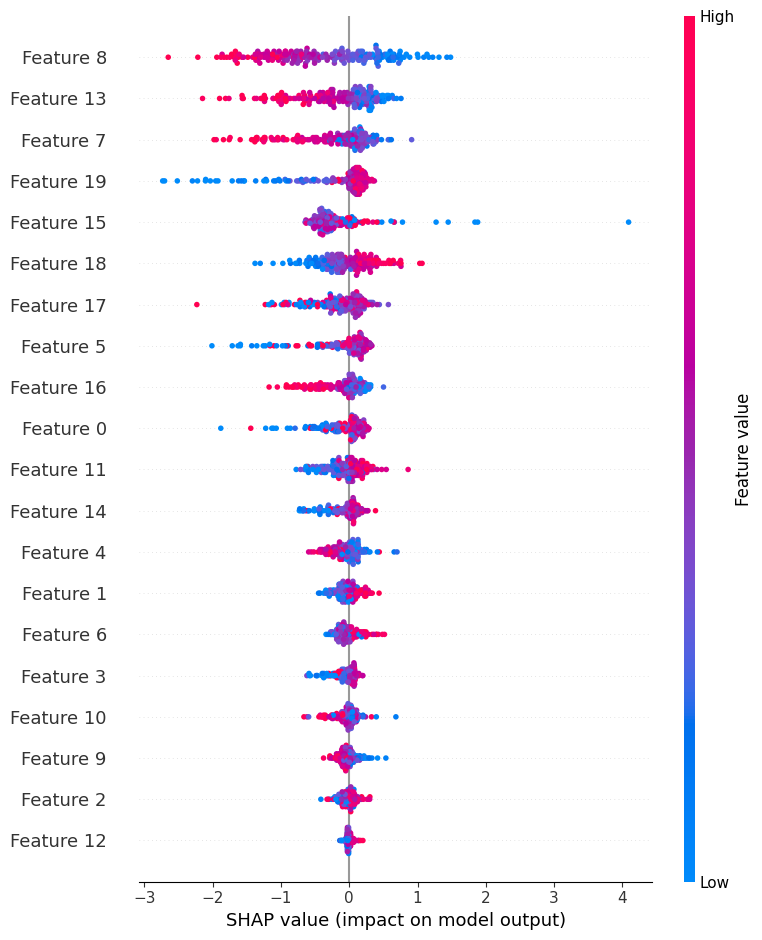

In [12]:
import time
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# ==== Generate synthetic dataset ====
X, y = make_classification(
    n_samples=120000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# ==== Train-Test Split ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# ==== Feature Scaling ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== Apply SMOTE ====
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# ==== Define Models ====
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=30, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=30, random_state=42, eval_metric='logloss', n_jobs=-1)
}

# Add Ensemble
models["Ensemble"] = VotingClassifier(
    estimators=[
        ('rf', models["Random Forest"]),
        ('gb', models["Gradient Boosting"]),
        ('xgb', models["XGBoost"])
    ],
    voting='soft',
    n_jobs=-1
)

roc_data = {}
best_model_name = None
best_auc = -1
best_model = None

# ==== Train & Evaluate ====
for name, model in models.items():
    print(f"\n{'='*50}\nTraining {name}\n{'='*50}")
    model.fit(X_train_balanced, y_train_balanced)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = auc(fpr, tpr)
        roc_data[name] = auc_score
        print(f"AUC: {auc_score:.4f}")
        if auc_score > best_auc:
            best_auc = auc_score
            best_model_name = name
            best_model = model

print(f"\nBest Model: {best_model_name} with AUC={best_auc:.4f}")

# ==== Apply SHAP on Best Model ====
print(f"\nApplying SHAP to {best_model_name}...")

explainer = None
if best_model_name in ["Random Forest", "Gradient Boosting", "XGBoost"]:
    explainer = shap.TreeExplainer(best_model)
elif best_model_name in ["Logistic Regression", "KNN", "Naive Bayes", "Decision Tree", "Ensemble"]:
    explainer = shap.Explainer(best_model.predict, X_train_balanced)
else:
    explainer = shap.Explainer(best_model, X_train_balanced)

shap_values = explainer(X_test_scaled[:200])  # Limit to 200 samples for speed

# ==== Plot SHAP Summary ====
shap.summary_plot(shap_values, X_test_scaled[:200], feature_names=[f"Feature {i}" for i in range(X.shape[1])])
